+--------+----------+------------+---------+
|   Step |   Actual |   Forecast |   Error |
+========+==========+============+=========+
|      0 |     50   |      50    |    0    |
+--------+----------+------------+---------+
|      1 |     49   |      50    |   -1    |
+--------+----------+------------+---------+
|      2 |     52   |      49.5  |    2.5  |
+--------+----------+------------+---------+
|      3 |     48   |      51.05 |   -3.05 |
+--------+----------+------------+---------+
|      4 |     45.5 |      48.98 |   -3.48 |
+--------+----------+------------+---------+


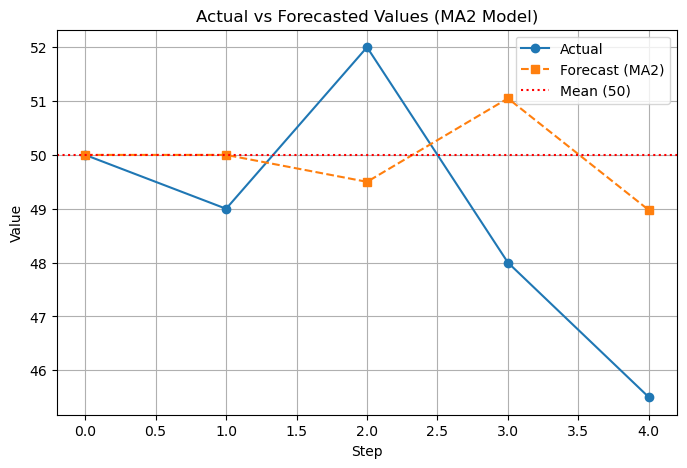

In [1]:
import matplotlib.pyplot as plt
from tabulate import tabulate


mean = 50
cofficient1, cofficient2 = 0.5, 0.2
actual = [50, 49, 52, 48, 45.5]


errors = []
forecast_value = []

for i in range(len(actual)):
    if i == 0:
        forecast = mean
    elif i == 1:
        forecast = mean + cofficient1 * errors[i-1]
    else:
        forecast = mean + cofficient1 * errors[i-1] + cofficient2 * errors[i-2]
    
    forecast_value.append(forecast)

    # Error = actual - forecast
    err = actual[i] - forecast
    errors.append(err)

table = []
for i in range(len(actual)):
    table.append([i, actual[i], round(forecast_value[i], 2), round(errors[i], 2)])

print(tabulate(table, headers=["Step", "Actual", "Forecast", "Error"], tablefmt="grid"))

# Plot
plt.figure(figsize=(8,5))
plt.plot(range(len(actual)), actual, marker='o', label="Actual")
plt.plot(range(len(forecast_value)), forecast_value, marker='s', linestyle="--", label="Forecast (MA2)")
plt.axhline(y=mean, color='r', linestyle=':', label="Mean (50)")

plt.title("Actual vs Forecasted Values (MA2 Model)")
plt.xlabel("Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()